In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

from hossam.util import *
from hossam.plot import *
from hossam.tensor import *

### [2] 데이터셋 준비하기

In [2]:
origin = my_read_excel("https://data.hossam.kr/edadata/titanic.xlsx", index_col='PassengerId', categories=['Survived', 'Pclass', 'Sex', 'Embarked'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  1309 non-null   category
 1   Pclass    1309 non-null   category
 2   Name      1309 non-null   object  
 3   Sex       1309 non-null   category
 4   Age       1046 non-null   float64 
 5   SibSp     1309 non-null   int64   
 6   Parch     1309 non-null   int64   
 7   Ticket    1309 non-null   object  
 8   Fare      1308 non-null   float64 
 9   Cabin     295 non-null    object  
 10  Embarked  1307 non-null   category
dtypes: category(4), float64(2), int64(2), object(3)
memory usage: 87.4+ KB
None

상위 5개 행
+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+---------+------------+
|   PassengerId |   Survived |   Pclass | Name                                                | Se

In [4]:
df = origin.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df_age = my_replace_missing_value(df[['Age']])
df['Age'] = df_age['Age']
df2 = df.dropna()
df3 = my_standard_scaler(df2, 'Survived')
df4 = my_labelling(df3, 'Sex')
df5 = my_dummies(df4, "Pclass", "Embarked")
df5['Survived'] = df5['Survived'].astype('int')

+--------+---------+
| Sex    |   label |
|--------+---------|
| female |       0 |
| male   |       1 |
+--------+---------+


In [7]:
df = my_minmax_scaler(data=df5, yname="Survived")

### [2] 훈련/검증 데이터 분할

In [9]:
x_train, x_test, y_train, y_test = my_train_test_split(data=df, yname="Survived")
rows, cols = x_train.shape

## #03. 학습 모델 적합

### [1] 기본 학습

+-------+----------+----------+
|       |      acc |     loss |
|-------+----------+----------|
| train |   0.8659 | 0.346301 |
| test  | 0.854962 |  0.33489 |
+-------+----------+----------+


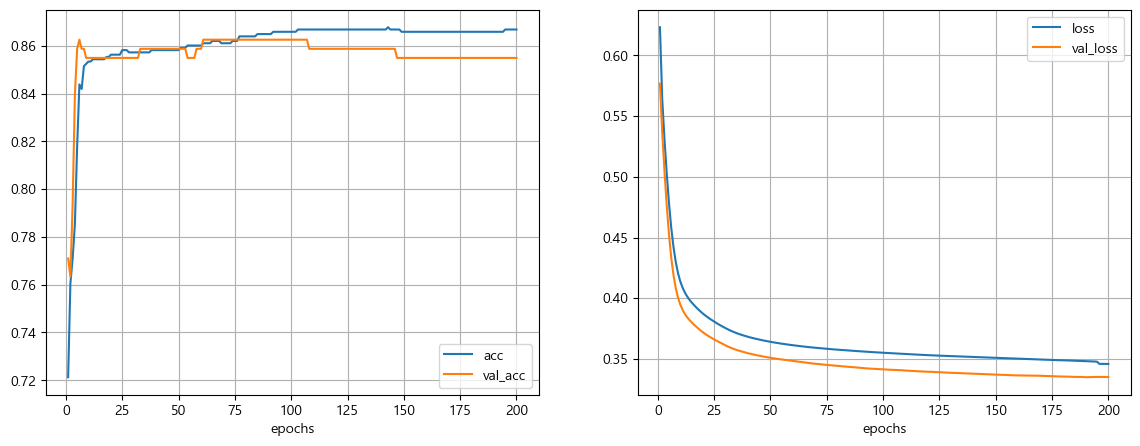

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |       0.8659 |     0.854962 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.865497 |         0.82 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.758974 |     0.803922 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |    0.0703364 |       0.1125 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.929664 |       0.8875 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.808743 |     0.811881 | 정밀도와 재현율의 조화평균                                |
+-------------------+--

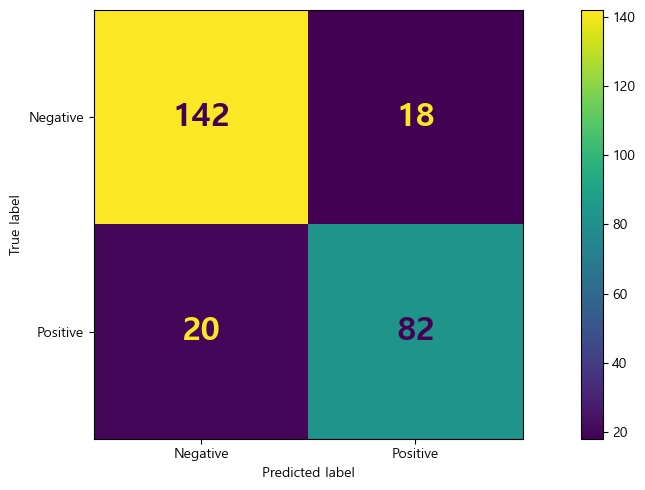


[Roc Curve]
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


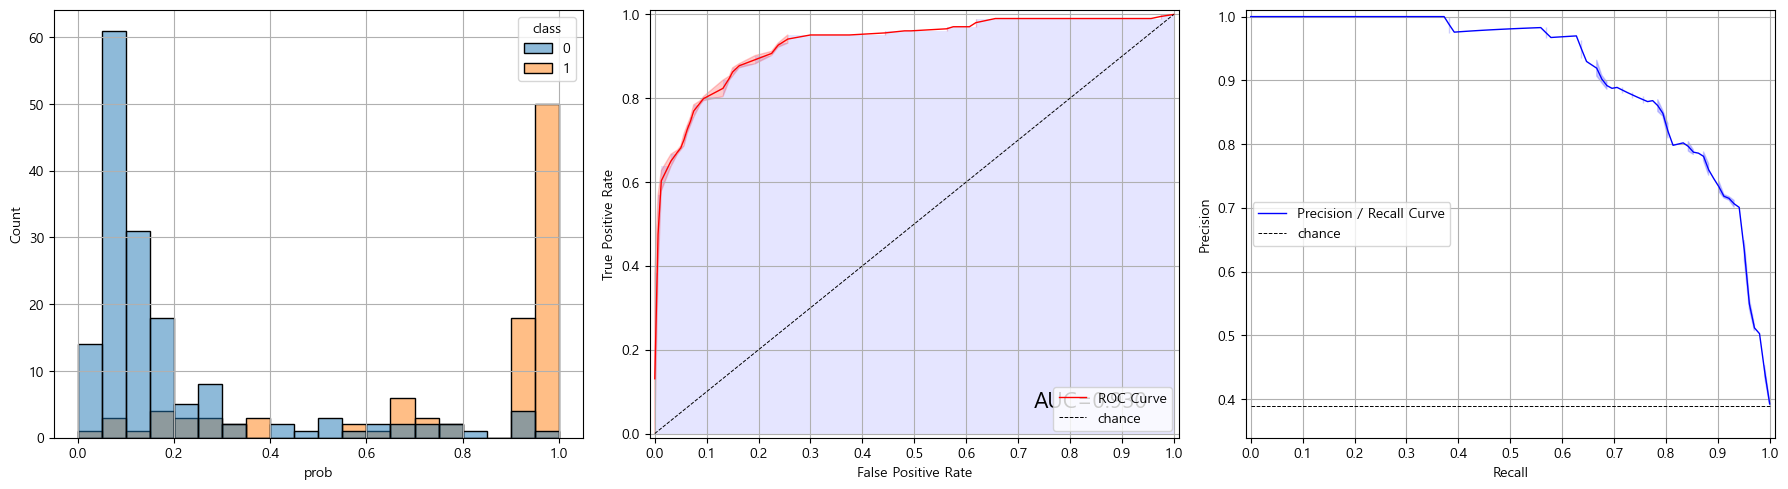


[학습곡선]
이 데이터는 학습곡선을 도출하는데 적합하지 않습니다.


+----+------------+------------+---------+
|    | 종속변수   | 독립변수   |     VIF |
|----+------------+------------+---------|
|  0 | Survived   | Age        | 4.87745 |
|  1 | Survived   | SibSp      | 1.56906 |
|  2 | Survived   | Parch      | 1.48958 |
|  3 | Survived   | Fare       | 2.36253 |
|  4 | Survived   | Sex        | 2.74732 |
|  5 | Survived   | Pclass_2   |  2.0238 |
|  6 | Survived   | Pclass_3   | 3.78763 |
|  7 | Survived   | Embarked_Q | 1.72501 |
|  8 | Survived   | Embarked_S | 4.27335 |
+----+------------+------------+---------+


In [12]:
model = my_tf(
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    dense= [
        {"units": 32, "activation": "relu", "input_shape": (x_train.shape[1], )},
        {"units": 1, "activation": "sigmoid"}
    ],
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["acc"]
)

my_classification_result(model, x_train, y_train, x_test, y_test)
my_classification_report(model, x_train, y_train, x_test, y_test)

### [2] 하이퍼파라미터 튜닝

Trial 9 Complete [00h 00m 03s]
val_acc: 0.8511450290679932

Best val_acc So Far: 0.8625954389572144
Total elapsed time: 00h 00m 37s
+-------+----------+----------+
|       |      acc |     loss |
|-------+----------+----------|
| train |   0.8659 | 0.343859 |
| test  | 0.866412 | 0.332278 |
+-------+----------+----------+


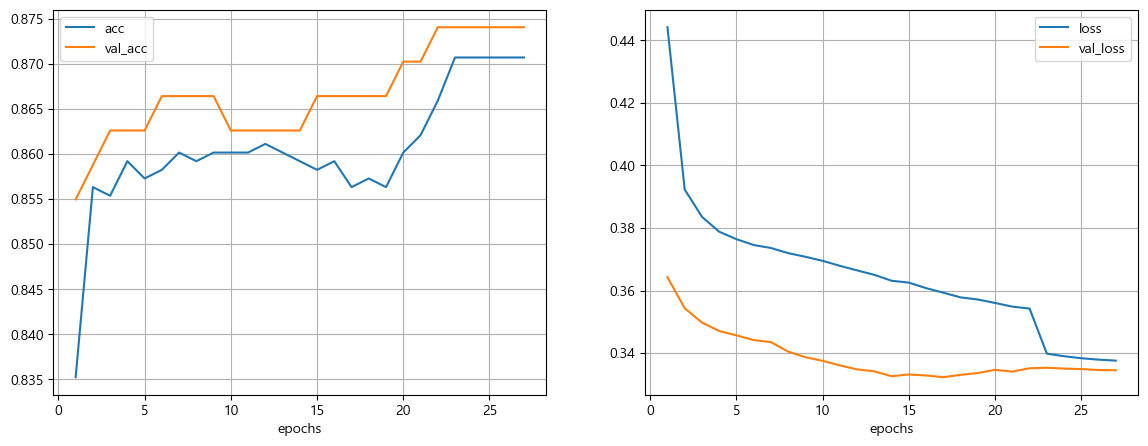

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |       0.8659 |     0.866412 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.869822 |     0.838384 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.753846 |     0.813725 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |    0.0672783 |          0.1 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.932722 |          0.9 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.807692 |     0.825871 | 정밀도와 재현율의 조화평균                                |
+-------------------+--

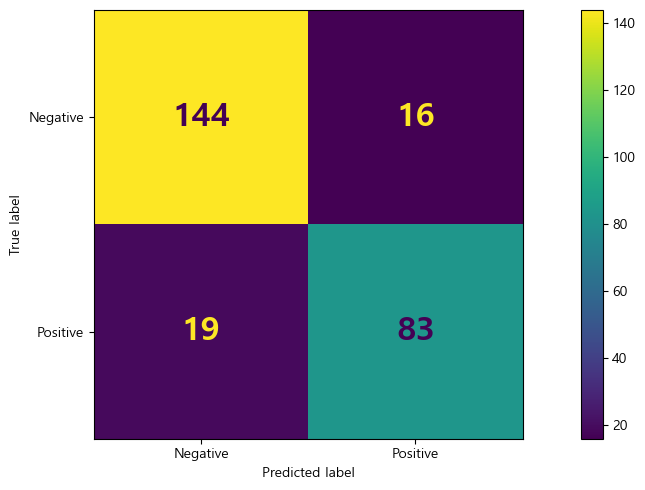


[Roc Curve]
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


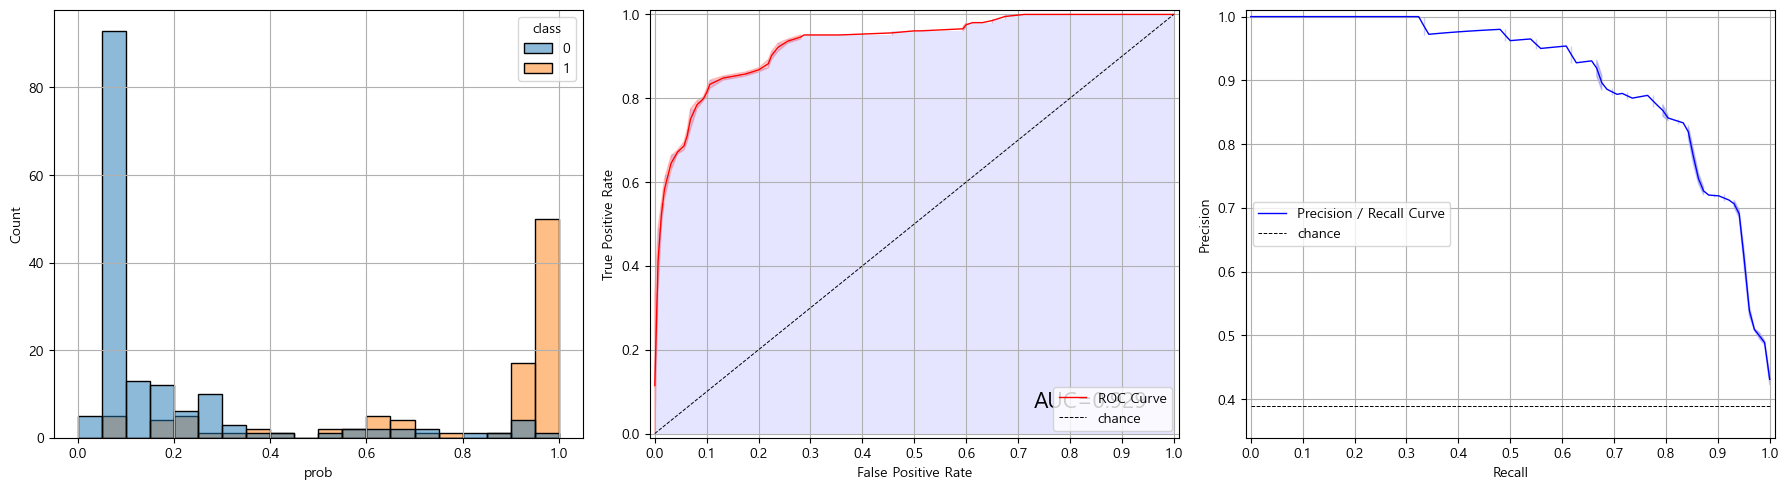


[학습곡선]
이 데이터는 학습곡선을 도출하는데 적합하지 않습니다.


+----+------------+------------+---------+
|    | 종속변수   | 독립변수   |     VIF |
|----+------------+------------+---------|
|  0 | Survived   | Age        | 4.87745 |
|  1 | Survived   | SibSp      | 1.56906 |
|  2 | Survived   | Parch      | 1.48958 |
|  3 | Survived   | Fare       | 2.36253 |
|  4 | Survived   | Sex        | 2.74732 |
|  5 | Survived   | Pclass_2   |  2.0238 |
|  6 | Survived   | Pclass_3   | 3.78763 |
|  7 | Survived   | Embarked_Q | 1.72501 |
|  8 | Survived   | Embarked_S | 4.27335 |
+----+------------+------------+---------+


In [13]:
model = my_tf(
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    dense_tune= [
        {"units": [128, 64, 32], "activation": "relu", "input_shape": (x_train.shape[1], )},
        {"units": 1, "activation": "sigmoid"}
    ],
    optimizer="rmsprop",
    directory="E:\\DataScience\\MainCourse\\tensor_hyperband",
    loss="binary_crossentropy",
    metrics=["acc"]
)

my_classification_result(model, x_train, y_train, x_test, y_test)
my_classification_report(model, x_train, y_train, x_test, y_test)

### [2] 이진 분류 전용 함수

Reloading Tuner from E:\DataScience\MainCourse\tensor_hyperband\tf_hyperband_20240415143439\tuner0.json
+-------+----------+----------+
|       |      acc |     loss |
|-------+----------+----------|
| train | 0.867816 | 0.344224 |
| test  | 0.866412 | 0.331111 |
+-------+----------+----------+


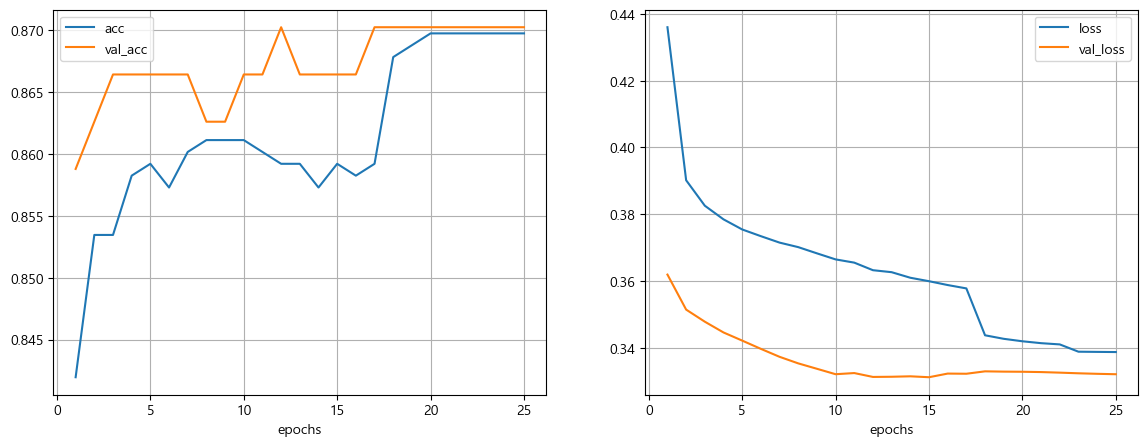

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.867816 |     0.866412 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |        0.875 |     0.838384 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.753846 |     0.813725 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |    0.0642202 |          0.1 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |      0.93578 |          0.9 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.809917 |     0.825871 | 정밀도와 재현율의 조화평균                                |
+-------------------+--

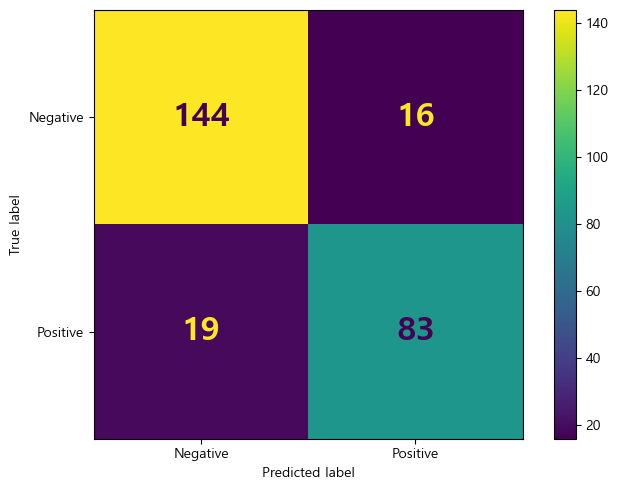


[Roc Curve]
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


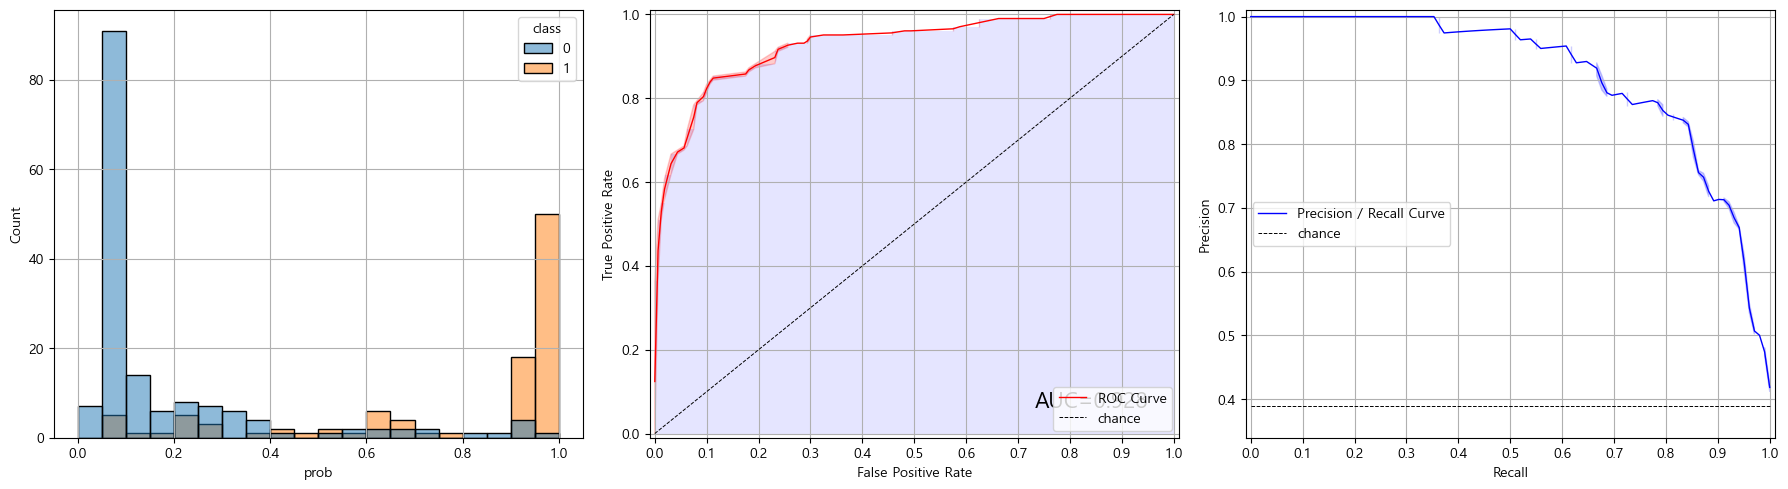


[학습곡선]
이 데이터는 학습곡선을 도출하는데 적합하지 않습니다.


+----+------------+------------+---------+
|    | 종속변수   | 독립변수   |     VIF |
|----+------------+------------+---------|
|  0 | Survived   | Age        | 4.87745 |
|  1 | Survived   | SibSp      | 1.56906 |
|  2 | Survived   | Parch      | 1.48958 |
|  3 | Survived   | Fare       | 2.36253 |
|  4 | Survived   | Sex        | 2.74732 |
|  5 | Survived   | Pclass_2   |  2.0238 |
|  6 | Survived   | Pclass_3   | 3.78763 |
|  7 | Survived   | Embarked_Q | 1.72501 |
|  8 | Survived   | Embarked_S | 4.27335 |
+----+------------+------------+---------+


<Sequential name=sequential_2, built=True>

In [20]:
my_tf_sigmoid(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, directory="E:\\DataScience\\MainCourse\\tensor_hyperband")